## Lab 4 Part I: Plotting Contoured Data to Help Assess Horizontal Temperature Advection
<br /><br />

In this week's tutorial, we are going to cover how to have Python contour model-analyzed 850 hPa data.  In this tutorial, we focus on two widely used Python modules in the atmospheric sciences, xarray for data processing and matplotlib for data plotting.  Once the tutorial is complete, you will have the maps you need to complete Parts I and II of Lab 4.
<br />
### Module Documentation
1. Xarray Dataset: https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html
2. Xarray with MetPy: https://unidata.github.io/MetPy/latest/tutorials/xarray_tutorial.html
3. Matplotlib Pyplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
4. Caropy crs: https://scitools.org.uk/cartopy/docs/latest/reference/crs.html
5. Cartopy Feature: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
6. Matplotlib Colors: https://matplotlib.org/stable/gallery/color/named_colors.html
7. Matplotlib Contour: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html
8. Matplotlib Barbs: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barbs.html
9. Scipy Gaussian Filter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html



If you have any questions about the code below, feel free to reach out to me at mpvossen@uwm.edu. I am always willing to further explain the code. <br /> <br />

---

<br />
1. As usual, we start by importing the modules we need for our Python code.

In [1]:
#import the cartopy (cartopy) module's coordinate reference system (.crs) and save it to crs
import cartopy.crs as crs
#import the cartopy (cartopy) module's ability to plot geographic data (.feature) and save it to cfeature 
import cartopy.feature as cfeature
#import the plotting abilities of the module matplotlib (import matplotlib.pyplot) and save it to plt
import matplotlib.pyplot as plt
#import the numpy module and save it to np
import numpy as np
#import the xarray module and save it to xr
import xarray as xr
#import the pandas module and save it to pd
import pandas as pd
#from the module scipy in the ndimage submodule import the gaussian filter function
from scipy.ndimage import gaussian_filter
#add this line so that the JupyterHub plots the maps within the Jupyter Notebook
%matplotlib inline

<br /><br />
2.  In today's tutorial, we are going to use data that I've already downloaded for you rather than current data.  

On the JupyterHub, all pre-downloaded data for this course are located in the /data/AtmSci360/Lab_#/ directory, where # is replaced by the lab number (in this case, 4).  

For this lab, we are going to use a GFS model 0-hour analysis file as a gridded proxy for observations.  The GFS data comes in a data format called GRIB (GRIdded Binary) which is the standard data format of the World Meteorlogical Orginization (WMO). Opening a GRIB file using xarray requires only one line of code, which I demonstrate below.  <br /> <br /> Note: xarray is not perfect when it comes to opening GRIB files, and there will be multiple warnings that display.  These warnings can be ignored in this case because all of the data is correct.

In [2]:
#Set the location of where the data are located for this lab
lab_data_loc = "/data/AtmSci360/Lab_4/"

"""
Use xarray's (xr) open_dataset function to open the grib file.  For this specific portion of the lab the file name is 111021_18_gfs.grib2
For xarray's open_dataset function we need to specify the engine parameter which tells xarray which module to use to parse the data.
For GRIB files, the parsing module is cfgrib, which is provided by the European Center for Medium-range Weather Forecasts (ECMWF).
In open_dataset, I also pass in the filter_by_keys argument.  The GRIB file being used contains multiple vertical coordinates, including height above sea level and pressure.  
In the filter keys, I specify that I only want the pressure vertical coordinate variables by including filter_by_keys={'typeOfLevel':'isobaricInhPa'}.
This filter name can be obtained by opening the file without the filter, then examining its contents and any error messages you obtained.

Note that I use an f-string below to insert the data path in the filename.
"""

data = xr.open_dataset(f"{lab_data_loc}111021_18_gfs.grib2", engine='cfgrib', filter_by_keys={'typeOfLevel': 'isobaricInhPa'})

#Display the data.  Note that xarray opens the data in a similar format to the satellite data in Lab 1, Part III.
data

Ignoring index file '/data/AtmSci360/Lab_4/111021_18_gfs.grib2.923a8.idx' incompatible with GRIB file
skipping variable: paramId==228164 shortName='tcc'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/dataset.py", line 660, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/dataset.py", line 593, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   40.,   30.,   20.,   15.,
         10.,    7.,    5.,    3.,    2.,    1.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 33, latitude: 721, longitude: 1440)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] ...
Data variables:
    gh             (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    wz             (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
    absv           (isobaricInhPa, latitude, longitude) float32 ...
    o3mr           (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2022-09-28T15:29 GRIB to CDM+CF via cfgrib-0.9.1...

<br /><br />
3. In the "Data variables:" section of the output, we can see that there are 10 variables.  You can get more detail about each variable by clicking on the sheet icon to the far right of each variable.  

In this lab, we will only need to use geopotential height, temperature, u-wind component, and v-wind component, so let's remove the variables that we don't need.  To remove these variables, we can use xarray's drop function:

In [3]:
#drop the variables we don't need in the data we opened above.
filtered_data = data.drop(["r","q","w","wz", "absv", "o3mr"])

#display the data without the variables we don't need
filtered_data

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 33, latitude: 721, longitude: 1440)
Coordinates:
    time           datetime64[ns] 2021-11-10T18:00:00
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] 2021-11-10T18:00:00
Data variables:
    gh             (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2022-09-28T15:29 GRIB to CDM+CF via cfgrib-0.9.1...

<br /><br />
4. Next, we want to further limit the data further by only selecting our desired vertical level.  We can do this using xarray's sel (short for select) function.  To use the sel function, we first need to find our vertical coordinate variable's name, which is "isobaricInhPa" in this dataset.  In the data displayed above, you can see what levels are available by clicking the cylinder with two lines icon on the line with the variable "isobaricInhPa".  Since we are creating an 850 hPa map, we want to select the 850 hPa level using the xarray sel function:

In [4]:
#use the select function to only select the 850 hPa level
#sel(variable name = variable value)
leveled_data = filtered_data.sel(isobaricInhPa = 850)
leveled_data

<xarray.Dataset>
Dimensions:        (latitude: 721, longitude: 1440)
Coordinates:
    time           datetime64[ns] 2021-11-10T18:00:00
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 850.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] 2021-11-10T18:00:00
Data variables:
    gh             (latitude, longitude) float32 ...
    t              (latitude, longitude) float32 ...
    u              (latitude, longitude) float32 ...
    v              (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2022-09-28T15:29 GRIB to CDM+CF via cfgrib-0.9.1...

<br /><br />
5. Now we need to limit the data's geographic area.  GFS files are global, but we only care about the United States and Canada.  We could just use the set_extent function when creating our maps, as we have used in past labs, but matplotlib will still try to plot the entire globe causing the plotting process to be slow.  Removing the data in geographic areas we don't need allows us to speed up the plotting process.  

To limit the geographic area, we can once again use xarray's sel function.  In our plot, we are going cover latitudes between 24°N and 53°N and longitudes between 115°W and 70°W.  Because we will use the curved Lambert conic conformal map projection for this plot, however, we need to retain a little bit of data that extends outside of the desired plotting range so that our plot is filled with data. For this map projection, it's best to leave 2° on both sides for latitude and 10° on both sides for longitude to make sure the entire map has data.

In [5]:
#Use the select command to select data that falls between the latitudes of 55°N and 22°N
wrangled_data = leveled_data.sel(latitude = slice(55,22))

#Use the select command to select data that falls between the longitudes of 125°W and 60°W
#Note that GFS defines longitude from 0-360° rather than -180° to 180°, so we must convert
#western longitudes to their 0-360° equivalents.
wrangled_data = wrangled_data.sel(longitude = slice(360-125,360-60))

<br /><br />
6. The last step of data wrangling is to get our data into the correct units.  With xarray, converting units is done differently than the observations we worked with in Lab 3.  Xarray is able to parse out the unit information contained with each variable in the GRIB file, allowing it to automatically assign the correct units to each variable.  Xarray also has MetPy functionalities built in, so all we have to do to convert the units is use MetPy's convert_units function directly on our data.  

In the dataset we have temperature in Kelvin and the winds are in m/s, both of which can be obtained from the information output when we displayed the full dataset above.  In the cell below, I convert temperature to Celsius and winds to knots.

In [9]:
#convert the temperature to Celsius and save the converted data back to the dataset.
wrangled_data['t'] = wrangled_data["t"]-273.15
#convert the u component of the wind to knots and save the converted data back to the dataset.
wrangled_data['u'] = wrangled_data["u"]*1.94
#convert the v component of the wind to knots and save the converted data back to the dataset.
wrangled_data['v'] = wrangled_data["v"]*1.94


<br /><br />
7. We are finally done with the data wrangling, so now it is time to plot the data.  In today's lab, we will have maptlotlib do the contouring for us.  Keep in mind, though, that matplotlib generates contours based only on the data that you provide - it knows nothing about any physical laws that may govern how you would manually contour data. While departures between the two are often small, it is worth manually checking the computer-generated contours before accepting them as "truth!"

It takes a lot of trial and error to make a "good" map.  When making maps from scratch, you will have to adjust various parameters and check to see how they look on the map, and then adjust the values before re-creating the map again to see how it looks.  I've done some of the trial and error already for you in this lab, but in the future I will be having you do most of the trial and error. 

Once again, we are creating the plot in a function so we can create multiple 850 hPa plots easily.  As usual, I will talk you through the plot in the comments below. Watch out for areas where you need to fill in code, though!

In [15]:
"""
In the line below I define the function plot_850_map.  The purpose of this function is to create an 850 hPa temperature, height, and wind map.  This function requires the following variables:

data : XARRAY DATASET
    This is the gridded dataset is going to be plotted.


"""


def plot_850_map(data):
    """
    Setup a Lambert Conformal Conic Projection centered at 40°N and 95°W.  Have the cone of the Lambert Conformal Conic projection intersect the Earth at 30°N and 50°N.
    """
    proj = crs.LambertConformal(central_longitude=-95, central_latitude=40, standard_parallels=[30,50])
    
    """
    Create a figure with the size of 1100x850 with a dpi of 300.
    """
    fig = plt.figure(figsize=(11,85),dpi=300)
    
    """
    Set up a subplot that uses the map projection we defined above.
    """
    ax = plt.subplot(projection = proj)
    
    """
    Add the states, borders and coastlines to the map.  Adjust the linewidth and edgecolor so that the geographic data doesn't make the data being displayed hard to read.
    """
    ax.add_feature(cfeature.LAND.with_scale('50m'), edgecolor = "black", facecolor='none',  linewidth=0.75, zorder=2)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor = "black",  facecolor='none', linewidth=0.75, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor = "grey", linestyle=":", facecolor='none', linewidth=0.5, zorder=1)



    """
    Set the plot extent to have longitudes between 115°W and 70°W and latitudes between 24°N and 53°N.
    """
    ax.set_extent((-115, -70, 24, 53))

    
    """
    If we were to directly plot the data, matplotlib would generate a lot of jagged contours, making the data difficult to analyze.  
    One way to make the data easier to analyze is to first smooth the data by applying a gaussian filter (basically, apply a bell curve at every data point) to the data.  
    To apply the gaussian filter, we use the scipy module's gaussian_filter function, which takes in the data and a user-specified value called sigma.  
    Sigma controls how much smoothing to apply to the data.  When setting sigma, you need to walk a fine line between smoothing out the data so it is easier to analyze and
    smoothing the data too much that it starts to remove important features.  For this case, I determined through trial and error that a sigma value of 2 for the geopotential height (gh) is the best value to use.
    Also when getting the geopotential height from the xarray I add .values to get just the geopotetnial height values rather than the full xarray (which includes more information about the data).

    """

    filtered_gh = gaussian_filter(data["gh"].values,2)
    
    """
    Below, I call matplotlib's line contour command.  This requires supplying your x, y (these representing longitude and latitude, respectively), and z (these representing the 
    meteorological field to contour) data for your first three arguments. The fourth argument (np.arange(0,12000,30)) sets your contour intervals.   Here, my contours are drawn at 30 m intervals starting at 0 m and 
    ending at 12000 m.  My fifth argument (linewidths = 0.7) determine the thickness of the line.  Larger values make the line thicker and smaller values make the line 
    thinner.  The sixth argument (colors='k') determines the contour color. The different color options available are in the link that I have above for matplotlib colors.  
    The last argument (transform=crs.PlateCarree()) says what horizonal coordinate system the data are in. Note that this is often different from the map projection you specify
    for your plot! Since our data is based in latitude and longitude, we need to set this to PlateCarree (an equirectangular latitude-longitude projection).  
    This entire command is saved to a variable, which allows us to later add labels to the contours.
    """
    cont = plt.contour(data["longitude"].values, data["latitude"].values, filtered_gh, np.arange(0,12000,30), linewidths = 0.7, colors='k', transform=crs.PlateCarree())
    
    
    """
    Every contour plot needs to label its contours. To do this, we use the clabel command.  The first argument (cont) is telling it which set of contours we wish to label.
    The second argument (cont.levels) sets the labels' values.  The third argument (inline=True) determines if the space behind the label is blank or does the contour 
    run through the label.  True means blank whereas False means the contour line runs through the label.  The fourth argument determines the label text's formatting.
    Here, we want geopotential height in decameters so we only keep the first three digits of the height.  The last argument
    (fontsize=6) determines the label's text size.  Larger values make the text larger and smaller values make the text smaller.
    """
    ax.clabel(cont, cont.levels, inline=True, fmt=lambda v: format(v, '.0f')[:3], fontsize=6)
    
    """
    Here I run the gaussian filter again, except now on the temperature data.
    """
    filtered_temp = gaussian_filter(data["t"].values, 2)
    
    """
    Below I plot the temperature contours.  I add the arguments of linestyles to specify the line styling (e.g. dashed or solid), alpha to determine their transparency, 
    and zorder to set the order at which the contour plots (relative to other data being plotted).  Zorder is set to 1 to have these contours plot behind the height contours.
    """
    cont_t = plt.contour(data["longitude"].values, data["latitude"].values, filtered_temp, np.arange(-30,32,2), colors='r', linewidths=0.5, linestyles="solid", transform=crs.PlateCarree(), alpha=0.6, zorder=1)
    
    """
    Next, I add the temperature contour labels to he plot.
    """
    ax.clabel(cont_t, cont_t.levels, inline=True, fmt=lambda v: format(v, '.0f'), fontsize=6)
    
    
    """
    Now, we begin plotting the wind barbs.  The first part of setting up the wind barbs is determining how to space the data.  There are data points every 0.25° latitude
    and longitude, which is too frequent to be able to draw wind barbs at every location.  Instead, we can space the wind barbs by skipping a specific number of data points.
    In the case below, we retain data only every 7 points (about ~150 km apart).  
    
    In the two lines below, I set a variable for x and y array slices to allow the user to have different values for numbers of points to skip 
    in the x and y direction.  The command I'm using is essentially like what you would use for an array.
    
    array[start:stop:skip] = array[slice(start,stop,skip)]
    
    Using 'None' for the start and stop arguments ensures the filtering applies to the entire dataset.
    """

    wind_slice_x = slice(None, None, 7)
    wind_slice_y = slice(None, None, 7)
    
    """
    Below is the matplotlib command to plot wind barbs.  The first and second arguments are the x (longitude) and y (latitude) values, respectively.  
    Note that latitude and longitude are 1D whereas the wind variables are 2D.  Thus, for position data, we only need to use the one wind slice direction that is appropriate.
    The third and fourth arguments are the u- and v-wind components.  Here we need to use both wind slices since our data is 2D.
    The fifth argument (color='black') determines the wind barb colors.  The matplotlib colors link can once again be used to see what colors you can use to plot the barbs.
    The sixth argument says what horizonal coordinate system the data are in.  
    The seventh argument (linewidth=0.6) determines the barb's width.  Larger values make them thicker and smaller values make them thinner.
    The final argument (length=4) determines the barb's length is.  Larger make the barbs longer and smaller make them shorter.
    """
    ax.barbs(data["longitude"][wind_slice_x].values, data["latitude"][wind_slice_y].values,
             data["u"][wind_slice_x, wind_slice_y].values,
             data["v"][wind_slice_x, wind_slice_y].values,
             color='black',transform=crs.PlateCarree(),linewidth=0.6, length=4)
    
    """
    As we mentioned when we talked about "good" plots, we need to title our plot the data's valid time.  In the data we have, there is a variable time which
    holds the data's valid time.  The problem with this time is that it is not in a datetime format like we are used to; instead, it is in a numpy
    datetime format.  We can use pandas module's datetime conversion function to convert this time's format:
    """
    data_time = pd.to_datetime(data["time"].values)
   
    """
    Setting the title for this kind of plot works the same way as any other plot, we made except I added one more argument.  By default, matplotlib titles
    are center-justified.  You can use the loc option to instead make the title left- or right-justified.  Here I create two titles.  The first shows what we are plotting justified
    to the left.  The second title I use to show the time that the plot is valid justified to the right. Note the text size and weight specification options.
    """
    plt.title("850 hPa Temperature (red | $\degree$C), Wind (barbs | kts), and Geopotential Heights (black | dm)", size=9, weight="bold", loc="left")
    plt.title(f"Valid: {data_time:%m/%d/%Y %H%M} UTC", size=7, loc="right")
    
    """
    Finally, let's see the plot when it is finished.
    """
    plt.show()

<br /><br />
8. Finally, let's run the plotting code.

In [16]:
plot_850_map(wrangled_data)

<br /><br />
9. For this lab, you will need to create a 850 hPa map for 1800 UTC April 7th, 2021.  In the code below, I complete the same steps that we followed above to create the desired map:

Can't create file '/data/AtmSci360/Lab_4/040721_18_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 522, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/opt/tljh/user/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 488, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/data/AtmSci360/Lab_4/040721_18_gfs.grib2.923a8.idx'
Can't read index file '/data/AtmSci360/Lab_4/040721_18_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 532, in from_indexpath_or_filestream
    index_mtime = os.path.getmtime(indexpath)
  File "/opt/tljh/user/lib/python3.7/genericpath.py", line 55, in getmti

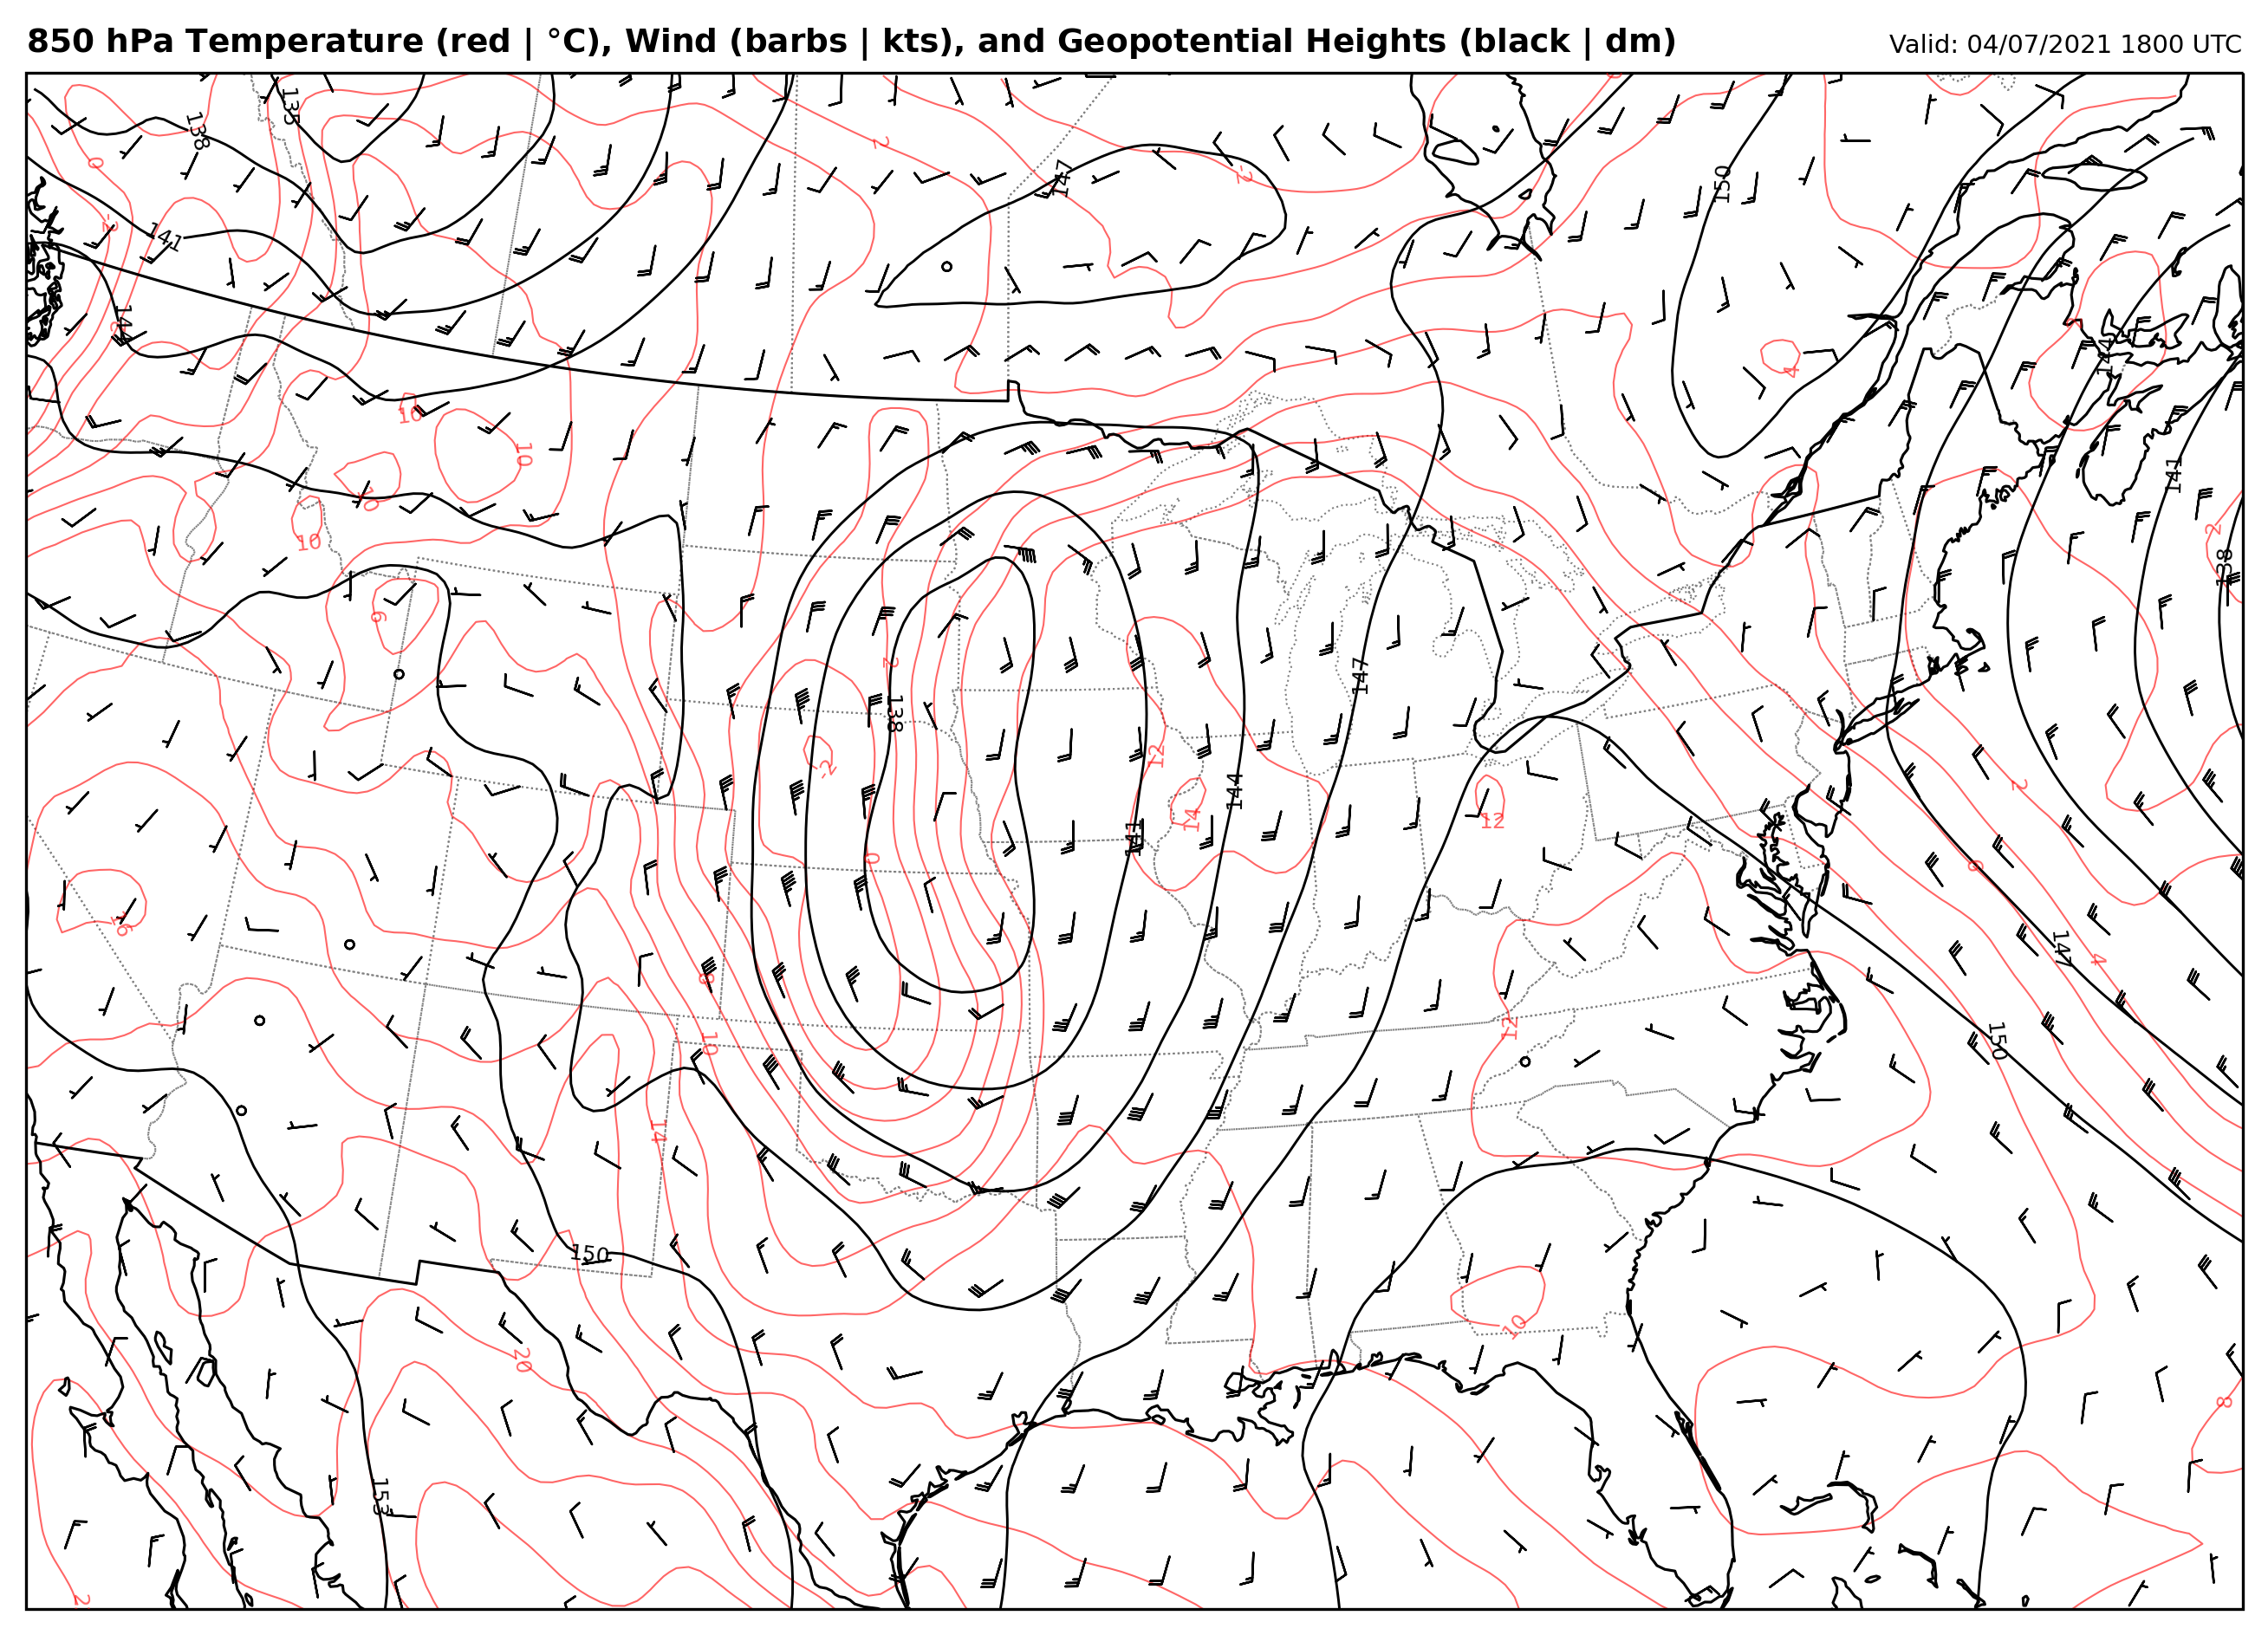

In [17]:
#open the data using xarray
data = xr.open_dataset(f"{lab_data_loc}040721_18_gfs.grib2", engine='cfgrib', filter_by_keys={'typeOfLevel': 'isobaricInhPa'})
#drop the variables we don't need in the data we opened above.
filtered_data = data.drop(["r","q","w","wz", "absv", "o3mr"])
#use the select function to only select the 850 hPa level
#sel(variable name = variable value)
leveled_data = filtered_data.sel(isobaricInhPa = 850)
#Use the select command to select data that falls between the latitudes of 55°N and 22°N
wrangled_data = leveled_data.sel(latitude = slice(55,22))

#Use the select command to select data that falls between the longitudes of 125°W and 60°W
wrangled_data = wrangled_data.sel(longitude = slice(360-125,360-60))


#convert the temperature to Celsius and save the converted data back to the dataset.
wrangled_data['t'] = wrangled_data["t"]-273.15
#convert the u component of the wind to knots and save the converted data back to the dataset.
wrangled_data['u'] = wrangled_data["u"]*1.94
#convert the v component of the wind to knots and save the converted data back to the dataset.
wrangled_data['v'] = wrangled_data["v"]*1.94

#plot the data
plot_850_map(wrangled_data)

### You have now completed Part I of the Python portion of the lab.  Be sure to submit the fully rendered Jupyter Notebook on GitHub when you are finished.